In [12]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np
from sklearn.preprocessing import RobustScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# use ggplot
plt.style.use('ggplot')

# GradientBoosting

Dieses Notizbuch zielt darauf ab, für jede Automarke ein Modell zu trainieren, um genauer vorhersagen zu können und einen niedrigeren RMSE zu erreichen. Bisher ist das Training eines Modells für jede Automarke eine Methodik, die das leistungsstärkste Modell hervorbringt. Als Ergebnis der vorherigen drei Notizbücher wird XGBoost als Regression für jedes Modell ausgewählt.

## Hyperparamter Tuning

In [4]:
cars = pd.read_csv('Cars_Data_Model.csv', sep=";", index_col=0)

In [5]:
# Behalte nur Samples mit einem Preis kleiner als 300,000 --> Ausreisser entfernen
cars = cars[cars["Preis"] < 300000]

In [6]:
pd.set_option('display.max_columns', None)

cars

,Preis,Kilometerstand,Fahrleistung p.a.,Türen,Komfort,Sicherheit,Extras,Erstzulassung,Unterhaltung/Media,Hubraum,Schadstoffklasse,Fahrzeugzustand,KW,PS,Marke_audi,Marke_bmw,Marke_mercedes-benz,Marke_opel,Marke_porsche,Marke_volkswagen,Modell_100,Modell_114,Modell_116,Modell_118,Modell_120,Modell_123,Modell_125,Modell_128,Modell_130,Modell_135,Modell_140,Modell_170,Modell_180,Modell_181,Modell_190,Modell_1er-m-coupé,Modell_200,Modell_2002,Modell_208,Modell_214,Modell_216,Modell_218,Modell_220,Modell_223,Modell_225,Modell_228,Modell_230,Modell_235,Modell_240,Modell_250,Modell_260,Modell_270,Modell_280,Modell_300,Modell_308,Modell_315,Modell_316,Modell_318,Modell_320,Modell_323,Modell_324,Modell_325,Modell_328,Modell_330,Modell_335,Modell_340,Modell_350,Modell_356,Modell_380,Modell_400,Modell_418,Modell_420,Modell_425,Modell_428,Modell_430,Modell_435,Modell_440,Modell_450,Modell_50,Modell_500,Modell_518,Modell_520,Modell_523,Modell_524,Modell_525,Modell_528,Modell_530,Modell_535,Modell_540,Modell_545,Modell_550,Modell_560,Modell_600,Modell_620,Modell_628,Modell_630,Modell_633,Modell_635,Modell_640,Modell_645,Modell_650,Modell_718,Modell_718-spyder,Modell_725,Modell_728,Modell_730,Modell_735,Modell_740,Modell_745,Modell_750,Modell_760,Modell_80,Modell_840,Modell_850,Modell_90,Modell_911,Modell_912,Modell_914,Modell_918,Modell_924,Modell_928,Modell_930,Modell_944,Modell_964,Modell_968,Modell_991,Modell_992,Modell_993,Modell_996,Modell_997,Modell_a-140,Modell_a-150,Modell_a-160,Modell_a-170,Modell_a-180,Modell_a-190,Modell_a-200,Modell_a-210,Modell_a-220,Modell_a-250,Modell_a-35-amg,Modell_a-45-amg,Modell_a1,Modell_a2,Modell_a3,Modell_a4,Modell_a4-allroad,Modell_a5,Modell_a6,Modell_a6-allroad,Modell_a7,Modell_a8,Modell_active-hybrid-3,Modell_active-hybrid-5,Modell_active-hybrid-7,Modell_adam,Modell_agila,Modell_allroad,Modell_amarok,Modell_amg-gt,Modell_ampera,Modell_antara,Modell_arteon,Modell_ascona,Modell_astra,Modell_atego,Modell_b-150,Modell_b-160,Modell_b-170,Modell_b-180,Modell_b-200,Modell_b-220,Modell_b-250,Modell_b-electric-drive,Modell_beetle,Modell_bora,Modell_boxster,Modell_buggy,Modell_bus,Modell_c-160,Modell_c-180,Modell_c-200,Modell_c-220,Modell_c-230,Modell_c-240,Modell_c-250,Modell_c-270,Modell_c-280,Modell_c-300,Modell_c-32-amg,Modell_c-320,Modell_c-350,Modell_c-400,Modell_c-43-amg,Modell_c-450,Modell_c-55-amg,Modell_c-63-amg,Modell_cabriolet,Modell_caddy,Modell_calibra,Modell_carrera-gt,Modell_cascada,Modell_cayenne,Modell_cayman,Modell_cc,Modell_ce-220,Modell_ce-230,Modell_ce-280,Modell_ce-300,Modell_citan,Modell_cl,Modell_cl-180,Modell_cl-200,Modell_cl-230,Modell_cl-320,Modell_cl-420,Modell_cl-500,Modell_cl-55-amg,Modell_cl-600,Modell_cl-63-amg,Modell_cl-65-amg,Modell_cla-180,Modell_cla-200,Modell_cla-220,Modell_cla-250,Modell_cla-35-amg,Modell_cla-45-amg,Modell_clc,Modell_cle,Modell_clk-200,Modell_clk-220,Modell_clk-230,Modell_clk-240,Modell_clk-270,Modell_clk-280,Modell_clk-320,Modell_clk-350,Modell_clk-430,Modell_clk-500,Modell_clk-55-amg,Modell_clk-63-amg,Modell_cls,Modell_cls-220,Modell_cls-250,Modell_cls-280,Modell_cls-300,Modell_cls-320,Modell_cls-350,Modell_cls-400,Modell_cls-450,Modell_cls-500,Modell_cls-53-amg,Modell_cls-55-amg,Modell_cls-63-amg,Modell_combo,Modell_combo-e,Modell_combo-e-life,Modell_combo-life,Modell_commodore,Modell_corrado,Modell_corsa,Modell_corsa-e,Modell_coupe,Modell_crafter,Modell_cross-golf,Modell_cross-touran,Modell_crossland,Modell_crossland-x,Modell_diplomat,Modell_e-200,Modell_e-220,Modell_e-230,Modell_e-240,Modell_e-250,Modell_e-260,Modell_e-270,Modell_e-280,Modell_e-290,Modell_e-300,Modell_e-320,Modell_e-350,Modell_e-36-amg,Modell_e-400,Modell_e-420,Modell_e-43-amg,Modell_e-430,Modell_e-450,Modell_e-50-amg,Modell_e-500,Modell_e-53-amg,Modell_e-55-amg,Modell_e-550,Modell_e-60-amg,Modell_e-63-amg,Modell_e-golf,Modell_e-tron,Modell_e-tron-gt,Modell_e-up!,Modell_eos,Modell_eqa,Modell_eqa-250,Modell_eqa-300,Modell_eqa-350,Modell_eqb-250,Modell_eqb-300,Modell_eqb-350,Modell_eqc

In [7]:
# split data into company groups
audi = cars[cars["Marke_audi"] == 1]
bmw = cars[cars["Marke_bmw"] == 1]
mercedes = cars[cars["Marke_mercedes-benz"] == 1]
opel = cars[cars["Marke_opel"] == 1]
porsche = cars[cars["Marke_porsche"] == 1]
volkswagen = cars[cars["Marke_volkswagen"] == 1]

In [8]:
len(audi) + len(bmw) + len(mercedes) + len(opel) + len(porsche) + len(volkswagen)

70306

Start modelling different companies

In [9]:
n_estimators = [100, 200, 300]
max_depths = [3, 5, 7]
learning_rates = [0.01, 0.1, 0.2]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt

class AutoPreisModell:
    def __init__(self, df, target_column, test_size=0.3, val_size=0.5, random_state=42):
        self.df = df
        self.target_column = target_column
        self.test_size = test_size
        self.val_size = val_size
        self.random_state = random_state

    def prepare_data(self):
        X = self.df.drop(self.target_column, axis=1)
        y = np.log(self.df[self.target_column])

        X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=self.val_size, random_state=self.random_state)

        self.scaler = RobustScaler().fit(X_train)
        self.X_train_scaled = self.scaler.transform(X_train)
        self.X_val_scaled = self.scaler.transform(X_val)
        self.X_test_scaled = self.scaler.transform(X_test)
        self.y_train = y_train
        self.y_val = y_val
        self.y_test = y_test

    def train_model(self, n_estimators, max_depths, learning_rates):
        best_rmse = float('inf')
        best_params = {}

        for estimator in n_estimators:
            for max_depth in max_depths:
                for rate in learning_rates:
                    model = GradientBoostingRegressor(n_estimators=estimator, max_depth=max_depth, learning_rate=rate, random_state=self.random_state)
                    model.fit(self.X_train_scaled, self.y_train)

                    y_val_pred = model.predict(self.X_val_scaled)
                    rmse = mean_squared_error(np.exp(self.y_val), np.exp(y_val_pred), squared=False)

                    if rmse < best_rmse:
                        best_rmse = rmse
                        best_params = {'n_estimators': estimator, 'max_depth': max_depth, 'learning_rate': rate}
                        self.best_model = model

        return best_params

    def evaluate_model(self):
        y_train_pred = self.best_model.predict(self.X_train_scaled)
        y_val_pred = self.best_model.predict(self.X_val_scaled)
        y_test_pred = self.best_model.predict(self.X_test_scaled)

        metrics = {
            'RMSE': {
                'Train': mean_squared_error(np.exp(self.y_train), np.exp(y_train_pred), squared=False),
                'Val': mean_squared_error(np.exp(self.y_val), np.exp(y_val_pred), squared=False),
                'Test': mean_squared_error(np.exp(self.y_test), np.exp(y_test_pred), squared=False)
            },
            'MAE': {
                'Train': mean_absolute_error(np.exp(self.y_train), np.exp(y_train_pred)),
                'Val': mean_absolute_error(np.exp(self.y_val), np.exp(y_val_pred)),
                'Test': mean_absolute_error(np.exp(self.y_test), np.exp(y_test_pred))
            },
            'MAPE': {
                'Train': mean_absolute_percentage_error(np.exp(self.y_train), np.exp(y_train_pred)),
                'Val': mean_absolute_percentage_error(np.exp(self.y_val), np.exp(y_val_pred)),
                'Test': mean_absolute_percentage_error(np.exp(self.y_test), np.exp(y_test_pred))
            },
            'R^2': {
                'Train': r2_score(np.exp(self.y_train), np.exp(y_train_pred)),
                'Val': r2_score(np.exp(self.y_val), np.exp(y_val_pred)),
                'Test': r2_score(np.exp(self.y_test), np.exp(y_test_pred))
            }
        }

        return metrics

    def plot_predictions(self):
        y_test_pred = self.best_model.predict(self.X_test_scaled)
        y_test_original = np.exp(self.y_test)
        y_test_pred_original = np.exp(y_test_pred)

        return y_test_original, y_test_pred_original

Verarbeitung: BMW

Evaluation Metrics for BMW:
RMSE:
  Train: 4249.2569
  Val: 7768.6046
  Test: 7053.3477
MAE:
  Train: 2750.7521
  Val: 3470.8677
  Test: 3582.0127
MAPE:
  Train: 0.0882
  Val: 0.1153
  Test: 0.1154
R^2:
  Train: 0.9705
  Val: 0.8979
  Test: 0.9262


Verarbeitung: Audi

Evaluation Metrics for Audi:
RMSE:
  Train: 3659.9615
  Val: 5625.2886
  Test: 7269.9206
MAE:
  Train: 2521.9206
  Val: 3505.9874
  Test: 3606.3094
MAPE:
  Train: 0.0601
  Val: 0.1006
  Test: 0.0905
R^2:
  Train: 0.9814
  Val: 0.9587
  Test: 0.9399


Verarbeitung: Mercedes

Evaluation Metrics for Mercedes:
RMSE:
  Train: 4649.7102
  Val: 9058.1845
  Test: 9012.6100
MAE:
  Train: 2613.4999
  Val: 3858.5622
  Test: 3983.9976
MAPE:
  Train: 0.0876
  Val: 0.1300
  Test: 0.1264
R^2:
  Train: 0.9741
  Val: 0.9039
  Test: 0.9033


Verarbeitung: Volkswagen

Evaluation Metrics for Volkswagen:
RMSE:
  Train: 2670.2879
  Val: 3995.5800
  Test: 4142.6664
MAE:
  Train: 1748.8882
  Val: 2638.5790
  Test: 2660.6070
M

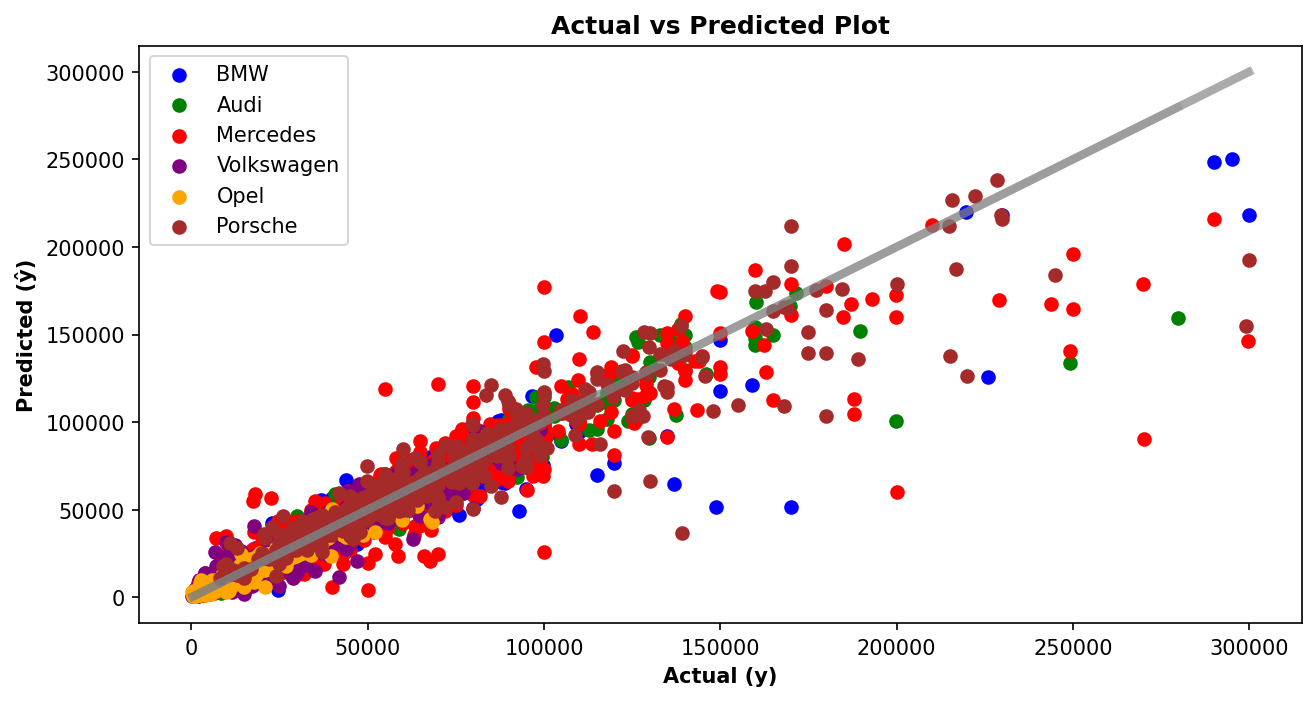

In [11]:
# Liste der Automarken DataFrames
auto_marken = [bmw, audi, mercedes, volkswagen, opel, porsche]
auto_namen = ["BMW", "Audi", "Mercedes", "Volkswagen", "Opel", "Porsche"]

# Vorab-Training der Modelle
modelle = {}
for name, auto_df in zip(auto_namen, auto_marken):
    print(f"Verarbeitung: {name}")
    auto_model = AutoPreisModell(auto_df, 'Preis')
    auto_model.prepare_data()
    auto_model.train_model(n_estimators, max_depths, learning_rates)
    modelle[name] = auto_model

    # Modell evaluieren und Metriken ausdrucken
    evaluation_metrics = auto_model.evaluate_model()
    print(f"\nEvaluation Metrics for {name}:")
    for metric, values in evaluation_metrics.items():
        print(f"{metric}:")
        for dataset, value in values.items():
            print(f"  {dataset}: {value:.4f}")
    print("\n" + "="*50 + "\n")


# Sammeln der Metriken und Testset-Größen
gesamte_metriken = {'RMSE': {'Train': [], 'Val': [], 'Test': []},
                    'MAE': {'Train': [], 'Val': [], 'Test': []},
                    'MAPE': {'Train': [], 'Val': [], 'Test': []},
                    'R^2': {'Train': [], 'Val': [], 'Test': []}}
testset_groessen = []

for name, auto_model in modelle.items():
    evaluation_metrics = auto_model.evaluate_model()
    for metric in gesamte_metriken:
        for dataset in gesamte_metriken[metric]:
            gesamte_metriken[metric][dataset].append(evaluation_metrics[metric][dataset])
    testset_groessen.append(len(auto_model.y_test))

# Berechnung des naiven Durchschnitts
naive_durchschnitt = {metric: {dataset: np.mean(values) for dataset, values in datasets.items()} 
                      for metric, datasets in gesamte_metriken.items()}

# Berechnung des gewichteten Durchschnitts
gewichteter_durchschnitt = {}
for metric, datasets in gesamte_metriken.items():
    gewichteter_durchschnitt[metric] = {}
    for dataset, values in datasets.items():
        gewichtet = np.average(values, weights=testset_groessen)
        gewichteter_durchschnitt[metric][dataset] = gewichtet

# Ausgabe der Ergebnisse
print("Naiver Durchschnitt der Metriken:")
for metric, datasets in naive_durchschnitt.items():
    print(f"{metric}:")
    for dataset, value in datasets.items():
        print(f"  {dataset}: {value:.4f}")

print("\nGewichteter Durchschnitt der Metriken:")
for metric, datasets in gewichteter_durchschnitt.items():
    print(f"{metric}:")
    for dataset, value in datasets.items():
        print(f"  {dataset}: {value:.4f}")


# Angepasste Plot-Funktion
def plot_all_predictions(modelle):
    fig, ax = plt.subplots(figsize=(10, 5), dpi=150)
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

    for name, auto_model in modelle.items():
        color = colors.pop(0)  # Entfernt die erste Farbe und verwendet sie für das aktuelle Modell
        y_test_original, y_test_pred_original = auto_model.plot_predictions()

        min_value = np.array([y_test_original.min(), y_test_pred_original.min()]).min()
        max_value = np.array([y_test_original.max(), y_test_pred_original.max()]).max()

        ax.scatter(y_test_original, y_test_pred_original, color=color, label=name)
        ax.plot([min_value, max_value], [min_value, max_value], lw=4, color="grey", alpha=0.3)

    ax.set_title("Actual vs Predicted Plot", fontweight="bold")
    ax.set_xlabel('Actual (y)', fontweight="bold")
    ax.set_ylabel('Predicted (ŷ)', fontweight="bold")
    ax.legend()

    plt.show()

# Aufruf der Plot-Funktion
plot_all_predictions(modelle)


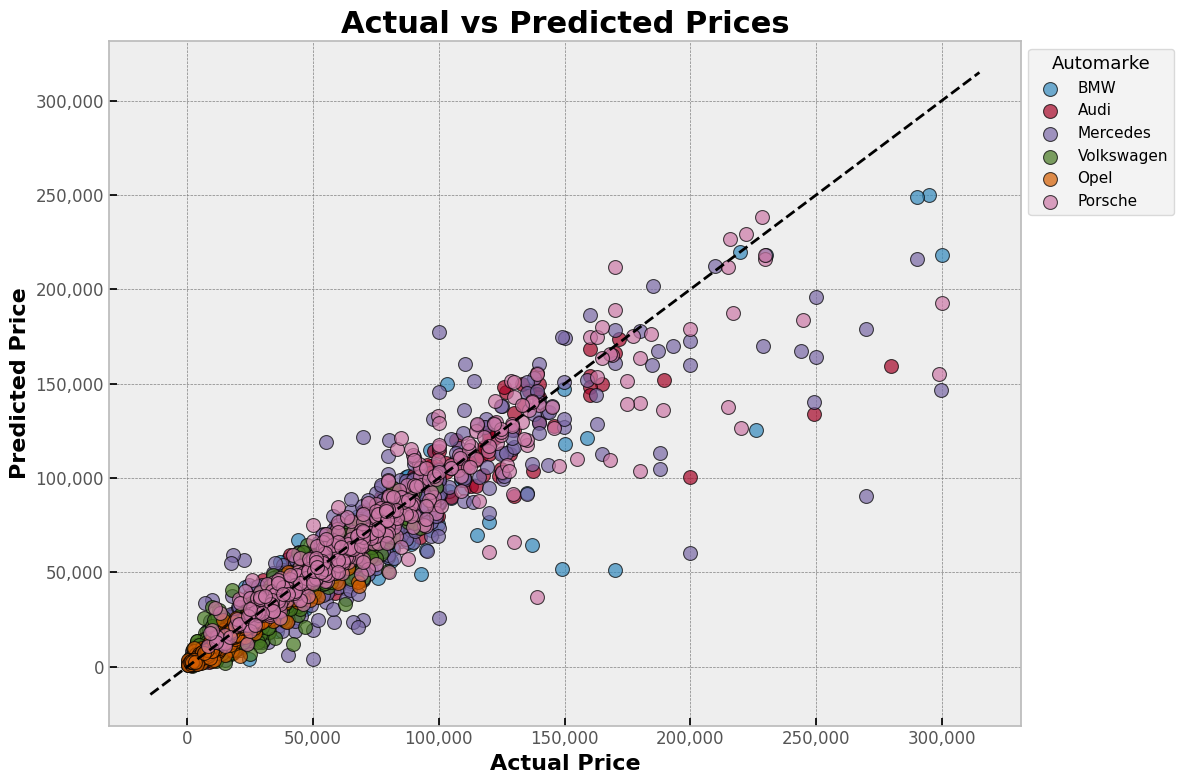

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.style.use('bmh')
sns.set_context('notebook')

# Angepasste Plot-Funktion
def plot_all_predictions(modelle):
    fig, ax = plt.subplots(figsize=(12, 8))
    colors = sns.color_palette('tab10', n_colors=len(modelle))  # Verwenden einer professionellen Farbpalette

    # Erstellen der Scatterplots für jedes Modell
    for name, auto_model in modelle.items():
        y_test_original, y_test_pred_original = auto_model.plot_predictions()
        sns.scatterplot(x=y_test_original, y=y_test_pred_original, label=name, ax=ax, s=100, alpha=0.7, edgecolor='black')

    # Linie der perfekten Übereinstimmung
    line_min = min(ax.get_xlim()[0], ax.get_ylim()[0])
    line_max = max(ax.get_xlim()[1], ax.get_ylim()[1])
    sns.lineplot(x=[line_min, line_max], y=[line_min, line_max], color='black', ax=ax, linewidth=2, linestyle='--')

    # Anpassen der Achsen und Gitter
    ax.grid(True, 'major', 'both', linestyle='--', linewidth=0.5, color='gray')
    ax.set_axisbelow(True)

    # Setzen von Achsen- und Titelbeschriftungen
    ax.set_title('Actual vs Predicted Prices', fontsize=22, fontweight='bold', color='black')
    ax.set_xlabel('Actual Price', fontsize=16, fontweight='bold', color='black')
    ax.set_ylabel('Predicted Price', fontsize=16, fontweight='bold', color='black')

    # Anpassen der Legende
    ax.legend(title='Automarke', title_fontsize='13', loc='upper left', bbox_to_anchor=(1, 1), frameon=True, framealpha=0.7)

    # Formatierung der Ticks
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    
    # Anpassen der Tick-Parameter
    ax.tick_params(axis='both', which='major', labelsize=12, color='black')

    # Anzeigen des Plots
    plt.tight_layout()
    plt.show()

# Aufruf der Plot-Funktion
plot_all_predictions(modelle)


Neural Network